# 1. Importação de Bibliotecas

In [1]:
import pandas as pd # Biblioteca para manipulação de dados
import numpy as np   # Biblioteca para operações numéricas

import matplotlib.pyplot as plt  # Biblioteca para visualização de dados
import seaborn as sns  # Biblioteca para visualização de dados

from collections import defaultdict  # Estrutura para agrupar itens em listas

# 2. Leitura e Exploração Inicial dos Dados

In [2]:
df_clientes = pd.read_csv(r"src/dados_clientes.csv", sep=';')  # Leitura do arquivo CSV de clientes

In [3]:
df_clientes.info()  # Exibe informações gerais sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238597 entries, 0 to 238596
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CD_CLIENTE              238597 non-null  object
 1   DS_PROD                 238597 non-null  object
 2   DS_LIN_REC              238597 non-null  object
 3   CIDADE                  238597 non-null  object
 4   DS_CNAE                 238597 non-null  object
 5   DS_SEGMENTO             238597 non-null  object
 6   DS_SUBSEGMENTO          238553 non-null  object
 7   FAT_FAIXA               238597 non-null  object
 8   MARCA_TOTVS             237693 non-null  object
 9   MODAL_COMERC            226965 non-null  object
 10  PAIS                    238597 non-null  int64 
 11  PERIODICIDADE           238531 non-null  object
 12  SITUACAO_CONTRATO       238096 non-null  object
 13  UF                      238597 non-null  object
 14  VL_TOTAL_CONTRATO       238597 non-n

# 3. Limpeza dos Dados

In [4]:
df_clientes_att = df_clientes.dropna()  # Remove linhas com valores ausentes
df_clientes_att.info()  # Exibe informações do DataFrame limpo

<class 'pandas.core.frame.DataFrame'>
Index: 226346 entries, 0 to 238596
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CD_CLIENTE              226346 non-null  object
 1   DS_PROD                 226346 non-null  object
 2   DS_LIN_REC              226346 non-null  object
 3   CIDADE                  226346 non-null  object
 4   DS_CNAE                 226346 non-null  object
 5   DS_SEGMENTO             226346 non-null  object
 6   DS_SUBSEGMENTO          226346 non-null  object
 7   FAT_FAIXA               226346 non-null  object
 8   MARCA_TOTVS             226346 non-null  object
 9   MODAL_COMERC            226346 non-null  object
 10  PAIS                    226346 non-null  int64 
 11  PERIODICIDADE           226346 non-null  object
 12  SITUACAO_CONTRATO       226346 non-null  object
 13  UF                      226346 non-null  object
 14  VL_TOTAL_CONTRATO       226346 non-null  

# 4. Filtragem por Segmento de Interesse

In [5]:
df_clientes_varejo = df_clientes_att[df_clientes_att.DS_SEGMENTO == 'SERVICOS']  # Seleciona apenas clientes do segmento 'SERVICOS'
df_clientes_att.shape, df_clientes_varejo.shape  # Mostra o tamanho dos DataFrames antes e depois do filtro

((226346, 16), (36424, 16))

# 5. Agrupamento de Produtos por Nicho

In [6]:
itens = df_clientes_varejo.DS_PROD.unique()  # Lista de produtos únicos

# Dicionário de nichos e palavras-chave associadas
nichos = {
    "SaaS": ["SAAS"],
    "Cloud": ["CLOUD", "CLOUDFICACAO"],
    "Consultoria": ["CONSULTORIA"],
    "Educação": ["EDUCACAO", "CURSOS"],
    "CRM": ["CRM"],
    "Financeiro / Techfin": ["TECHFIN", "RECEITA", "NFCE"],
    "Hardware": ["HARDWARE"],
    "Serviços Mensalizados": ["MENSALIZADOS"],
    "Integração / Plataforma": ["PLATAFORMA", "PVT", "CMNET"],
    "Inteligência de Mercado": ["INTELIGENCIA"]
}

agrupados = defaultdict(list)  # Dicionário para agrupar produtos por nicho

# Loop para classificar cada produto em um nicho
for item in itens:
    item_upper = item.upper()
    encontrado = False
    for nicho, palavras in nichos.items():
        if any(palavra in item_upper for palavra in palavras):
            agrupados[nicho].append(item)
            encontrado = True
            break
    if not encontrado:
        agrupados["Outros"].append(item)  # Produtos que não se encaixam em nenhum nicho vão para 'Outros'


# 6. Criação do DataFrame de Nichos

In [7]:
dados_nichos = []
for nicho, lista in agrupados.items():
    for segmento in lista:
        dados_nichos.append((segmento, nicho))  # Cria tuplas (produto, nicho)

df_nichos = pd.DataFrame(dados_nichos, columns=["DS_PROD", "NICHO"])  # DataFrame com produtos e seus nichos
df_clientes_varejo.DS_PROD.nunique(), df_nichos.shape  # Mostra quantidade de produtos únicos e tamanho do DataFrame de nichos


(3060, (3060, 2))

# 7. Junção dos Dados de Nicho ao DataFrame Principal

In [8]:
df_clientes_varejo_att = df_clientes_varejo.merge(df_nichos, how='left', on='DS_PROD')  # Junta os nichos ao DataFrame principal

# 8. Visualização dos Dados Enriquecidos

In [9]:
df_clientes_varejo_att.head(10)  # Exibe as 10 primeiras linhas do DataFrame enriquecido

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO,NICHO
0,99958,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"1633817,36581438",2016-04-07,Outros
1,99958,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"42,0343698218297",2016-04-07,Outros
2,T00018,FEE - GDS INTERNACIONAL,RECEITA TRANSACIONAL,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",HOSPITALIDADE - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,"0,420385736791976",2002-01-01,Outros
3,T00018,ASSINATURA MENSAL INTERNET CMN,SERVICOS CMNET RESERVAS,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",HOSPITALIDADE - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,"0,739878896753878",2002-01-01,Outros
4,T00018,SMS LGT G. CAP HUMANO TRAD,SMS TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",RH - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,SP,"203,063126299996",2015-09-02,Outros
5,T00018,SMS LGT G. CAP HUMANO TRAD,SMS TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",RH - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SP,"0,0126115721037593",2015-09-02,Outros
6,T00018,FEE - GDS NACIONAL,RECEITA TRANSACIONAL,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",HOSPITALIDADE - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,"0,420385736791976",2002-01-01,Outros
7,99958,SMS FULL TOTVS ALUG,SAAS SMS ALUGUEL,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,00 - Mensal,GRATUITO,SC,"56,5544931706245",2016-04-07,Outros
8,T00361,PONTO DE VENDA POS > 1 ID,SAAS CMNET THEX,SAOPAULO,OUTRAS ATIVIDADES ASSOCIATIVAS PROFISSIONAIS,SERVICOS,PROVEDOR SERVICOS,Sem Informações de Faturamento,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,CANCELADO,SP,"222,682528636078",2021-10-14,Outros
9,T00018,SMS TOTVS TEC USER,SMS TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",TECNOLOGIA,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SP,"0,0210192868395988",2015-09-02,Outros


# 9. Criação de Coluna de Trimestre

In [10]:
df_clientes_varejo_att['QUARTER'] = pd.to_datetime(df_clientes_varejo_att.DT_ASSINATURA_CONTRATO).dt.quarter  # Extrai o trimestre da data de assinatura

# 10. Análise de Quantidade de Clientes por Nicho e Trimestre

In [11]:
df_clientes_varejo_att.groupby(['NICHO', 'QUARTER']).NICHO.value_counts().reset_index()  # Agrupa e conta clientes por nicho e trimestre

,NICHO,QUARTER,count
0,CRM,1,36
1,CRM,2,72
2,CRM,3,45
3,CRM,4,61
4,Cloud,1,429
5,Cloud,2,441
6,Cloud,3,472
7,Cloud,4,663
8,Consultoria,3,1
9,Consultoria,4,2


In [12]:
df_clientes_varejo_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36424 entries, 0 to 36423
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CD_CLIENTE              36424 non-null  object
 1   DS_PROD                 36424 non-null  object
 2   DS_LIN_REC              36424 non-null  object
 3   CIDADE                  36424 non-null  object
 4   DS_CNAE                 36424 non-null  object
 5   DS_SEGMENTO             36424 non-null  object
 6   DS_SUBSEGMENTO          36424 non-null  object
 7   FAT_FAIXA               36424 non-null  object
 8   MARCA_TOTVS             36424 non-null  object
 9   MODAL_COMERC            36424 non-null  object
 10  PAIS                    36424 non-null  int64 
 11  PERIODICIDADE           36424 non-null  object
 12  SITUACAO_CONTRATO       36424 non-null  object
 13  UF                      36424 non-null  object
 14  VL_TOTAL_CONTRATO       36424 non-null  object
 15  DT

In [13]:
#tipos de dados
df_clientes_varejo_att['DS_SEGMENTO'] = df_clientes_varejo_att['DS_SEGMENTO'].astype('string')  # Converte coluna para tipo categórico
df_clientes_varejo_att['DS_PROD'] = df_clientes_varejo_att['DS_PROD'].astype('string')  # Converte coluna para tipo categórico
df_clientes_varejo_att['NICHO'] = df_clientes_varejo_att['NICHO'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['VL_TOTAL_CONTRATO'] = df_clientes_varejo_att['VL_TOTAL_CONTRATO'].str.replace(',','.', regex=False).astype(float).round(2)  # Converte coluna para tipo categórico


In [14]:
df_clientes_varejo_att.head(2)

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO,NICHO,QUARTER
0,99958,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,1633817.37,2016-04-07,Outros,2
1,99958,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,42.03,2016-04-07,Outros,2


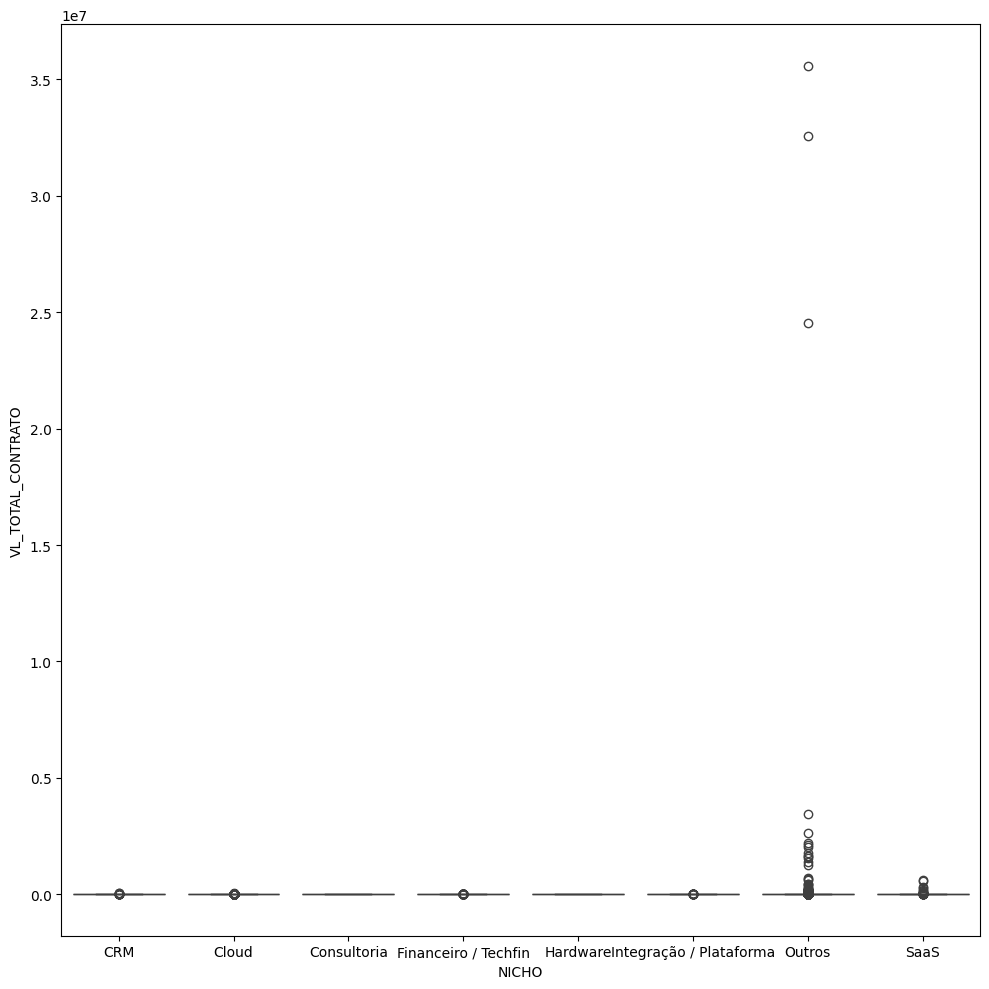

In [15]:
#carregar variaveis para plot
variaveis_numericas = df_clientes_varejo_att[['VL_TOTAL_CONTRATO','NICHO']]  # Lista de variáveis numéricas para plotagem

plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(1, 1)

sns.boxplot(data = variaveis_numericas, x='NICHO', y='VL_TOTAL_CONTRATO')  # Boxplot para o nicho

plt.show()

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


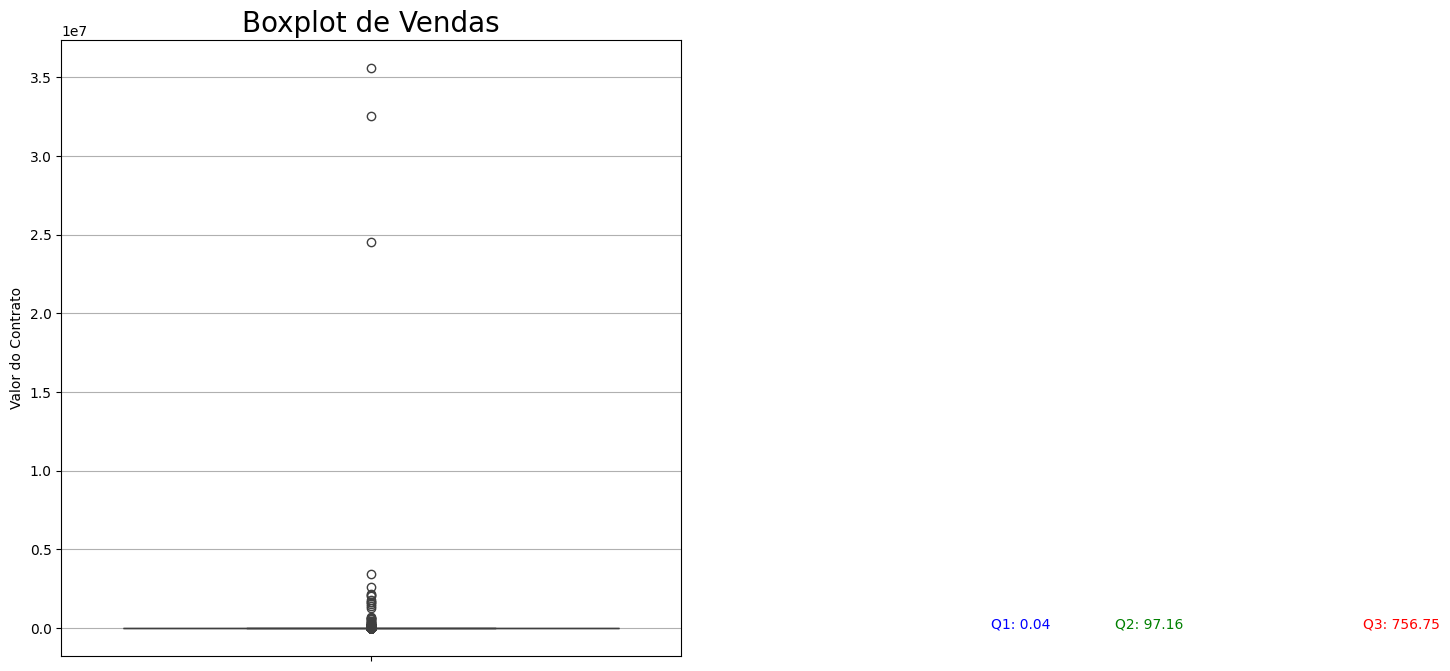

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dados
valores = df_clientes_varejo_att["VL_TOTAL_CONTRATO"]

# Cálculo dos quartis e IQR
q1 = valores.quantile(0.25)
q2 = valores.quantile(0.50)
q3 = valores.quantile(0.75)
iqr = q3 - q1

lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

# Plot
plt.figure(figsize=(8, 8))
sns.boxplot(data=df_clientes_varejo_att, y="VL_TOTAL_CONTRATO", orient='v')

# Anotações dos quartis
plt.text(1, q1, f"Q1: {q1:.2f}", color="blue")
plt.text(1.2, q2, f"Q2: {q2:.2f}", color="green")
plt.text(1.6, q3, f"Q3: {q3:.2f}", color="red")

# Titulo e rótulos
plt.title("Boxplot de Vendas")
plt.ylabel("Valor do Contrato")
plt.grid(True, axis='y')


# Exibe o gráfico
plt.show()


### Outliers com VL_TOTAL_CONTRATO acima de 20M

In [17]:
Q1 = df_clientes_varejo_att['VL_TOTAL_CONTRATO'].quantile(0.25)
Q3 = df_clientes_varejo_att['VL_TOTAL_CONTRATO'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f'Limite inferior: {limite_inferior}')
print(f'Limite superior: {limite_superior}')

#Número de Outliers
outliers = df_clientes_varejo_att[(df_clientes_varejo_att["VL_TOTAL_CONTRATO"] < lim_inferior) | (df_clientes_varejo_att["VL_TOTAL_CONTRATO"] > lim_superior)]

# Filtrando o DataFrame sem outliers
df_sem_outliers = df_clientes_varejo_att[(df_clientes_varejo_att['VL_TOTAL_CONTRATO'] >= limite_inferior) & (df_clientes_varejo_att['VL_TOTAL_CONTRATO'] <= limite_superior)]

print(f'Tamanho original: {df_clientes_varejo_att.shape[0]}')
print(f"Quantidade de outliers: {len(outliers)}")
print(f'Tamanho sem outliers: {df_sem_outliers.shape[0]}')

Limite inferior: -1135.025
Limite superior: 1891.815
Tamanho original: 36424
Quantidade de outliers: 5466
Tamanho sem outliers: 30958


/tmp/ipykernel_772/3000355622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['VL_TOTAL_CONTRATO_NORM'] = df_sem_outliers['VL_TOTAL_CONTRATO'] / df_clientes_varejo_att['VL_TOTAL_CONTRATO'].max()


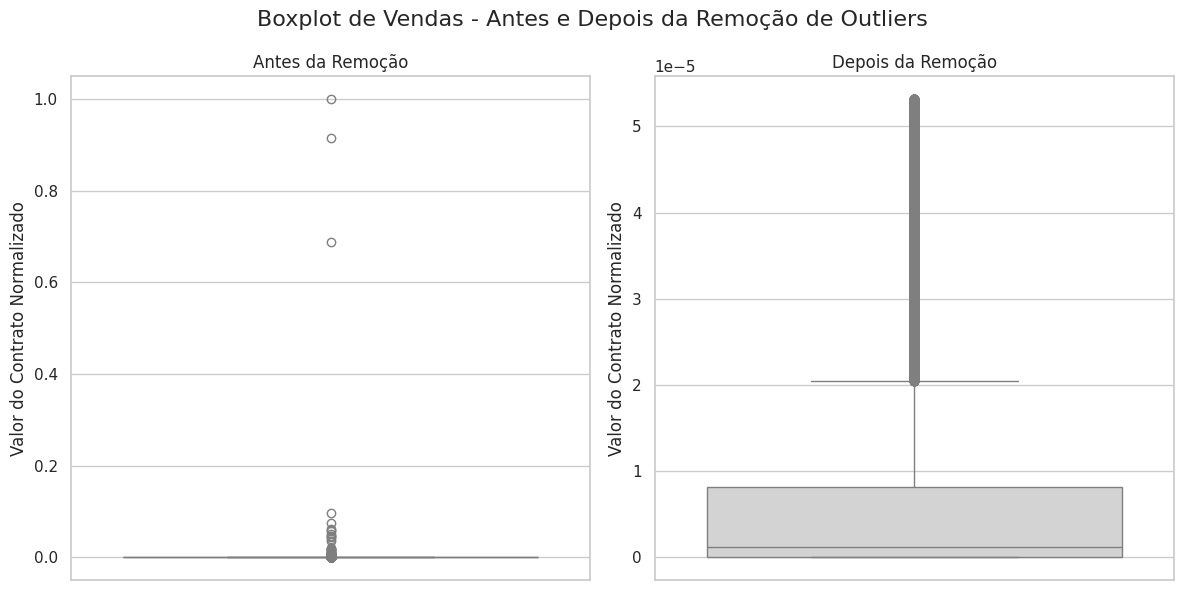

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Normalização
df_clientes_varejo_att['VL_TOTAL_CONTRATO_NORM'] = df_clientes_varejo_att['VL_TOTAL_CONTRATO'] / df_clientes_varejo_att['VL_TOTAL_CONTRATO'].max()
df_sem_outliers['VL_TOTAL_CONTRATO_NORM'] = df_sem_outliers['VL_TOTAL_CONTRATO'] / df_clientes_varejo_att['VL_TOTAL_CONTRATO'].max()

# Plotando lado a lado
plt.subplot(1, 2, 1)
sns.boxplot(
    y=df_clientes_varejo_att['VL_TOTAL_CONTRATO_NORM'], 
    color='lightgray'
)
plt.title('Antes da Remoção')
plt.ylabel('Valor do Contrato Normalizado')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.boxplot(
    y=df_sem_outliers['VL_TOTAL_CONTRATO_NORM'], 
    color='lightgray'
)
plt.title('Depois da Remoção')
plt.ylabel('Valor do Contrato Normalizado')
plt.xlabel('')

plt.suptitle('Boxplot de Vendas - Antes e Depois da Remoção de Outliers', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
#importando tabela histórico
df_historico = pd.read_csv(r"src/historico.csv", sep=';')  # Leitura do arquivo CSV de histórico
df_historico.info()  # Exibe informações gerais sobre o DataFrame
df_historico.head(5) #Exibindo tabela histórico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22740 entries, 0 to 22739
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NR_PROPOSTA             22740 non-null  object
 1   ITEM_PROPOSTA           22740 non-null  int64 
 2   DT_UPLOAD               22740 non-null  object
 3   HOSPEDAGEM              22740 non-null  object
 4   CD_CLI                  22740 non-null  object
 5   FAT_FAIXA               22740 non-null  object
 6   CD_PROD                 22740 non-null  object
 7   QTD                     22740 non-null  object
 8   MESES_BONIF             22740 non-null  int64 
 9   VL_PCT_DESC_TEMP        22740 non-null  object
 10  VL_PCT_DESCONTO         22740 non-null  object
 11  PRC_UNITARIO            22740 non-null  object
 12  VL_DESCONTO_TEMPORARIO  22740 non-null  object
 13  VL_TOTAL                22740 non-null  object
 14  VL_FULL                 22740 non-null  object
 15  VL

,NR_PROPOSTA,ITEM_PROPOSTA,DT_UPLOAD,HOSPEDAGEM,CD_CLI,FAT_FAIXA,CD_PROD,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO,VL_TOTAL,VL_FULL,VL_DESCONTO
0,AAMQSF,1,2025-03-25,ON PREMISES,TFDPFE,Sem Informações de Faturamento,0113301112,1,0,0,"28,6492879623732","2101,92868395988",0,"2101,92868395988","6599,31618873727","4497,38750477739"
1,AAJUVA,7,2024-03-28,ON PREMISES,T03306,Faixa 08 - De 150 M ate 300 M,AUT.04.000450,1,0,0,0,"0,53388988572581",0,"0,53388988572581","0,53388988572581",0
2,AAKX71,1,2024-08-21,ON PREMISES,T48463,Faixa 03 - De 15 M ate 25 M,1M13301050,1,0,0,0,"1222,89790447049",0,"1222,89790447049","63,0578605187964",0
3,AAMJNP,1,2025-02-17,ON PREMISES,TFEED1,Sem Informações de Faturamento,71A3301148,1,0,0,0,"60,1067526465167",0,"60,1067526465167","60,1067526465167",0
4,AAKFC4,1,2024-05-23,ON PREMISES,TDC1GA,Sem Informações de Faturamento,CONSV.502,"4,5",0,0,0,"93,9520083156387",0,"422,786139349058","0,0189173581556389",0


In [26]:
df_historico.isnull().sum()  # Verifica valores nulos em cada coluna

NR_PROPOSTA               0
ITEM_PROPOSTA             0
DT_UPLOAD                 0
HOSPEDAGEM                0
CD_CLI                    0
FAT_FAIXA                 0
CD_PROD                   0
QTD                       0
MESES_BONIF               0
VL_PCT_DESC_TEMP          0
VL_PCT_DESCONTO           0
PRC_UNITARIO              0
VL_DESCONTO_TEMPORARIO    0
VL_TOTAL                  0
VL_FULL                   0
VL_DESCONTO               0
dtype: int64